In [44]:
import matplotlib
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import r2_score

In [45]:
df = pd.read_csv('data1009test.csv',encoding='UTF-8-Sig')
x = torch.tensor(df.iloc[:,1:-1].to_numpy()).to(torch.float32)
y = torch.tensor(df.iloc[:,-1].to_numpy()).to(torch.float32)
x.shape

torch.Size([8, 168])

In [46]:
import torch
import torch.nn.functional as F   

class My_model(torch.nn.Module): 
    def __init__(self, input_dim):
        super(My_model, self).__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(input_dim, 167),
            nn.ReLU(),
            nn.Linear(167, 1)
        )
        
    def forward(self, x):
        x = self.layers(x)
        x = x.squeeze(1)
        return x

net = My_model(input_dim=x.shape[1])
device = 'cuda' if torch.cuda.is_available() else 'cpu'
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False, foreach=None, maximize=False, capturable=False)
loss_function = torch.nn.MSELoss(reduction='mean')

print(net)  # net 的结构

My_model(
  (layers): Sequential(
    (0): Linear(in_features=168, out_features=167, bias=True)
    (1): ReLU()
    (2): Linear(in_features=167, out_features=1, bias=True)
  )
)


In [47]:
#檢查
checkpoint = torch.load('model_state_dict1.pt')
net.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
net = net.eval()

prediction = net(x).to(device)
loss = loss_function(prediction,y).to(device)

pred,actual = pd.DataFrame(prediction.data.numpy()), pd.DataFrame(y.data.numpy())
compare = pd.DataFrame(columns=['actual','predict'])
compare['actual'],compare['predict'] = y.data.numpy(), prediction.data.numpy()
compare = compare.T

loss:  29687.562


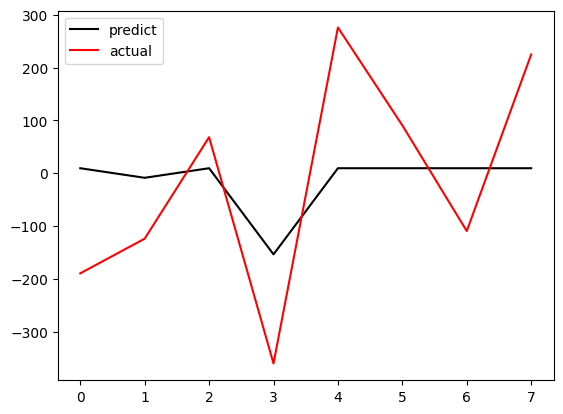

In [48]:
ax = plt.gca()
print('loss: ',loss.data.numpy())
# compare.columns = ['9/29','10/2','10/3','10/4','10/5']
compare.T.plot(kind='line',y ='predict',ax=ax,color='black')
compare.T.plot(kind='line',y ='actual',ax=ax,color='red')
plt.show()

# Display all model layer weights
# for name, para in net.named_parameters():
#     print('{}: {}'.format(name, para.shape))

In [49]:
compare.T.corr()
compare

,0,1,2,3,4,5,6,7
actual,-189.769547,-124.099609,68.189461,-360.519531,276.039062,90.620117,-109.679688,224.910156
predict,9.386759,-8.741392,9.386759,-153.776840,9.386759,9.386759,9.386759,9.386759


In [50]:
#RMSE
((np.array([(compare.T['actual']-compare.T['predict'])**2]).sum())/len(compare.T['actual']))**0.5

172.30079643787198

In [51]:
# R**2 
r2_score(compare.T['actual'],compare.T['predict'])

0.2827564011169582

In [52]:
for i in net.parameters():
    print(i)

Parameter containing:
tensor([[ 0.0048,  0.0018,  0.0686,  ..., -0.0004, -0.0753, -0.0535],
        [ 0.0100, -0.0351,  0.0488,  ...,  0.0435, -0.0339, -0.0602],
        [ 0.0472, -0.0136,  0.0476,  ..., -0.0238, -0.0211, -0.0836],
        ...,
        [-0.0407,  0.0432,  0.0122,  ..., -0.1146, -0.0424,  0.1681],
        [ 0.0605,  0.0049, -0.0700,  ..., -0.0682, -0.0399,  0.0321],
        [ 0.0722,  0.0428, -0.0768,  ...,  0.0308, -0.0346, -0.0455]],
       requires_grad=True)
Parameter containing:
tensor([-0.0224, -0.0868, -0.0322,  0.0403,  0.0029,  0.1028, -0.0405, -0.0093,
        -0.0279, -0.0117,  0.0437, -0.0988, -0.0674,  0.0261, -0.0794, -0.0580,
         0.0728,  0.0353, -0.0306,  0.1823, -0.1008,  0.0085, -0.2303, -0.0689,
        -0.0096,  0.1980,  0.0573,  0.0451, -0.1537, -0.0844,  0.0702,  0.0564,
        -0.0482,  0.1129, -0.0148, -0.0130, -0.0699, -0.1294, -0.0177,  0.0036,
        -0.0520, -0.1073,  0.0324, -0.0515,  0.0580,  0.0204, -0.0443,  0.0912,
        -0.0222